# Université Abdelmalek Essaadi

## Faculté des Sciences et Techniques de Tanger
### Département Génie Informatique

**Cycle:** LSI  
**Course:** Deep Learning  
**Professor:** Pr. ELAACHAK Lotfi  
**Lab:** 1  

**Objective:**  
This lab aims to familiarize with the PyTorch library for implementing Classification and Regression tasks using Deep Neural Networks (DNN)/MLP architectures.  

**Work to do:**  
- **Part one:** Regression  
- **Part two:** Multi-class Classification  

### Made by : Hind EL OUAHABI



In [ ]:
# Part One Regression

In [2]:
## Load Dataset
import pandas as pd
import numpy as np

data_prices = pd.read_csv('prices-split-adjusted.csv')
print(data_prices.head())


         date symbol        open       close         low        high  \
0  2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  


In [ ]:
data_prices.describe()

,open,close,low,high,volume
count,136709.000000,136709.000000,136709.000000,136709.000000,1.367090e+05
mean,42.025728,42.053344,41.542152,42.500689,7.103531e+06
std,35.341486,35.349836,34.941351,35.725539,1.676660e+07
min,3.680000,3.680000,3.650000,3.740000,0.000000e+00
25%,22.391415,22.400000,22.100000,22.680000,1.467700e+06
50%,34.410000,34.439999,34.020000,34.759998,3.110800e+06
75%,51.110001,51.150002,50.579949,51.680000,6.558200e+06
max,466.609985,462.339996,459.510010,469.399994,6.551166e+08


date      datetime64[ns]
symbol            object
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object
date      0
symbol    0
open      0
close     0
low       1
high      1
volume    1
dtype: int64


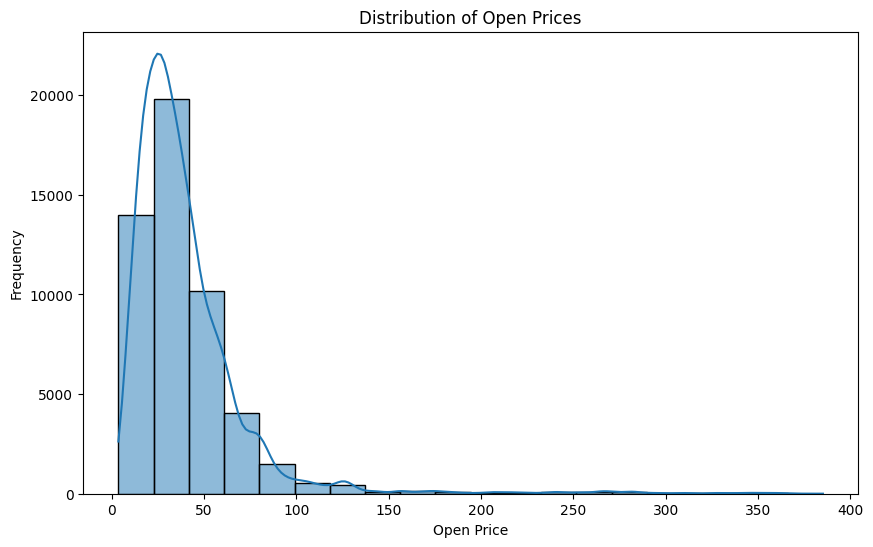

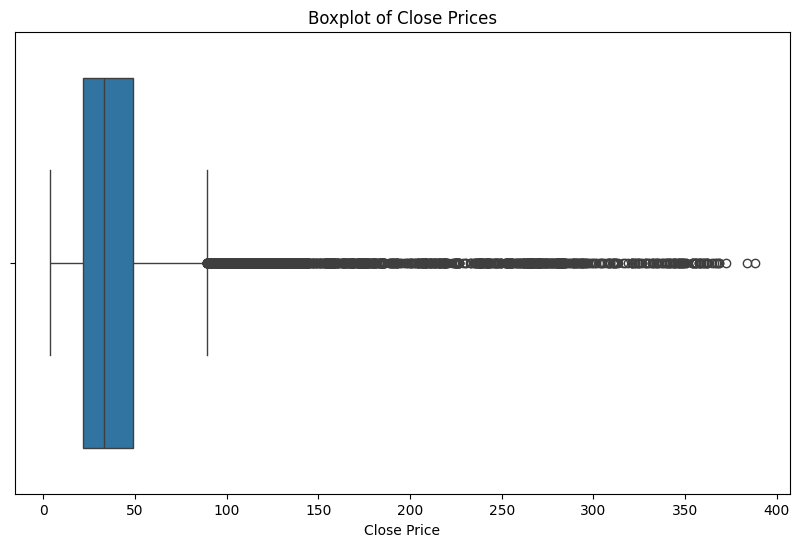

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Check data types
print(data_prices.dtypes)


# Missing values
print(data_prices.isnull().sum())

# Data Visualization
# Histogram of 'open' prices
plt.figure(figsize=(10, 6))
sns.histplot(data_prices['open'], bins=20, kde=True)
plt.title('Distribution of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot of 'close' prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_prices['close'])
plt.title('Boxplot of Close Prices')
plt.xlabel('Close Price')
plt.show()


Establish a Deep Neural network Architecture by using PyTorch library to handle the
regression task



In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define your deep neural network architecture
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(DeepNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

# Define hyperparameters
input_size = 5  # Number of features
hidden_size1 = 128  # Number of neurons in the first hidden layer
hidden_size2 = 64  # Number of neurons in the second hidden layer
output_size = 1  # Number of output neurons
learning_rate = 0.01
optimizer_class = optim.Adam

# Create an instance of the model
model = DeepNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Dummy input data and labels (replace with your actual data)
X_train = np.random.rand(100, input_size).astype(np.float32)
y_train = np.random.rand(100, output_size).astype(np.float32)
X_test = np.random.rand(50, input_size).astype(np.float32)
y_test = np.random.rand(50, output_size).astype(np.float32)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)

# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate MAE after training
mae = torch.mean(torch.abs(outputs - y_train_tensor))

# Display the final loss and MAE
print(f'Final Loss: {loss.item():.4f}, Final MAE: {mae.item():.4f}')


Epoch [100/1000], Loss: 0.0325
Epoch [200/1000], Loss: 0.0135
Epoch [300/1000], Loss: 0.0072
Epoch [400/1000], Loss: 0.0073
Epoch [500/1000], Loss: 0.0033
Epoch [600/1000], Loss: 0.0026
Epoch [700/1000], Loss: 0.0012
Epoch [800/1000], Loss: 0.0008
Epoch [900/1000], Loss: 0.0023
Epoch [1000/1000], Loss: 0.0010
Final Loss: 0.0010, Final MAE: 0.0257


By using GridSearch tool from sklearn library chose the best hyper-parameters (learning rate ,
optimizers, epoch, model architecture, etc) that will give an efficient model.

In [12]:
from itertools import product


# Define hyperparameters
input_size = 5  # Number of features
output_size = 1  # Number of output neurons


# Define hyperparameters grid
learning_rates = [0.001, 0.01, 0.1]
optimizers = [optim.SGD, optim.Adam]
hidden_sizes = [(32, 16), (64, 32), (128, 64)]

best_model = None
best_loss = float('inf')

# Perform grid search
for lr, optimizer_class, (hidden_size1, hidden_size2) in product(learning_rates, optimizers, hidden_sizes):
    # Create an instance of the model
    model = DeepNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optimizer_class(model.parameters(), lr=lr)

    # Training the model
    num_epochs = 1000
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print loss every 100 epochs
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Check if this model is the best so far
    if loss < best_loss:
        best_loss = loss
        best_model = model
        best_lr = lr
        best_optimizer = optimizer_class
        best_hidden_size1 = hidden_size1
        best_hidden_size2 = hidden_size2

# Print the best hyperparameters
print("Best hyperparameters:")
print(f"Learning Rate: {best_lr}")
print(f"Optimizer: {best_optimizer}")
print(f"Hidden Size 1: {best_hidden_size1}")
print(f"Hidden Size 2: {best_hidden_size2}")


Epoch [100/1000], Loss: 0.2217
Epoch [200/1000], Loss: 0.1442
Epoch [300/1000], Loss: 0.1096
Epoch [400/1000], Loss: 0.0943
Epoch [500/1000], Loss: 0.0877
Epoch [600/1000], Loss: 0.0848
Epoch [700/1000], Loss: 0.0836
Epoch [800/1000], Loss: 0.0831
Epoch [900/1000], Loss: 0.0828
Epoch [1000/1000], Loss: 0.0827
Epoch [100/1000], Loss: 0.1566
Epoch [200/1000], Loss: 0.1110
Epoch [300/1000], Loss: 0.0940
Epoch [400/1000], Loss: 0.0876
Epoch [500/1000], Loss: 0.0853
Epoch [600/1000], Loss: 0.0844
Epoch [700/1000], Loss: 0.0840
Epoch [800/1000], Loss: 0.0839
Epoch [900/1000], Loss: 0.0838
Epoch [1000/1000], Loss: 0.0837
Epoch [100/1000], Loss: 0.1723
Epoch [200/1000], Loss: 0.1069
Epoch [300/1000], Loss: 0.0896
Epoch [400/1000], Loss: 0.0856
Epoch [500/1000], Loss: 0.0846
Epoch [600/1000], Loss: 0.0843
Epoch [700/1000], Loss: 0.0841
Epoch [800/1000], Loss: 0.0840
Epoch [900/1000], Loss: 0.0838
Epoch [1000/1000], Loss: 0.0837
Epoch [100/1000], Loss: 0.0817
Epoch [200/1000], Loss: 0.0726
Epoch

Visualize the two graph (Loss / Epochs) and (Accuracy / Epochs) for both training and test
data, give your interpretation.

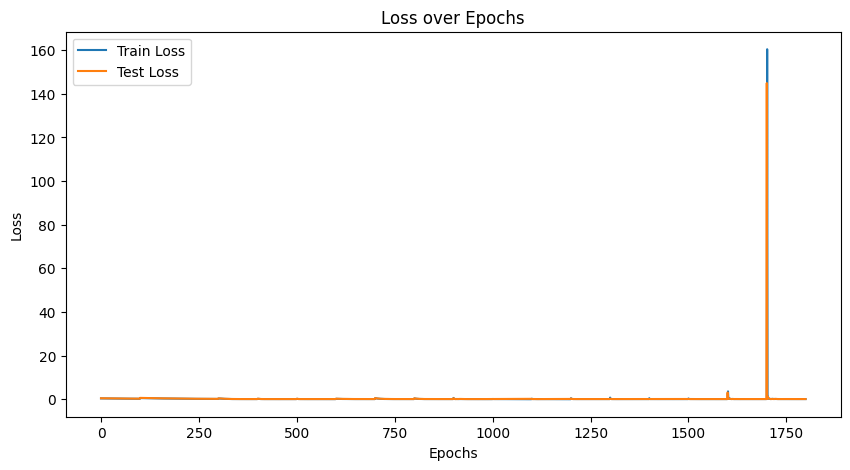

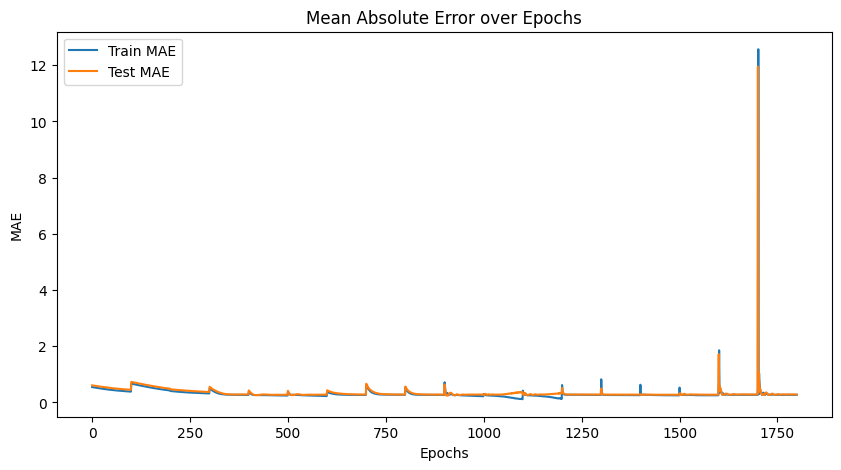

In [14]:
import matplotlib.pyplot as plt


# Track loss and MAE for training and test data
train_losses = []
test_losses = []
train_maes = []
test_maes = []

# Perform grid search
for lr, optimizer_class, (hidden_size1, hidden_size2) in product(learning_rates, optimizers, hidden_sizes):
    # Create an instance of the model
    model = DeepNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optimizer_class(model.parameters(), lr=lr)

    # Training the model
    num_epochs = 100
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        # Compute MAE
        mae = torch.mean(torch.abs(outputs - y_train_tensor))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Compute loss and MAE for test data
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
            test_mae = torch.mean(torch.abs(test_outputs - y_test_tensor))

        # Append losses and MAE to lists
        train_losses.append(loss.item())
        test_losses.append(test_loss.item())
        train_maes.append(mae.item())
        test_maes.append(test_mae.item())

# Visualize loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize MAE over epochs
plt.figure(figsize=(10, 5))
plt.plot(train_maes, label='Train MAE')
plt.plot(test_maes, label='Test MAE')
plt.title('Mean Absolute Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [10]:
# Define your deep neural network architecture with regularization
class RegularizedDeepNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_rate=0.5, l1_reg=0.01, l2_reg=0.01):
        super(RegularizedDeepNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.dropout = nn.Dropout(dropout_rate)
        self.l1_reg = l1_reg
        self.l2_reg = l2_reg

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out


# Define the model
model = RegularizedDeepNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.MSELoss()
optimizer = optimizer_class(model.parameters(), lr=learning_rate)

# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Apply L1 regularization
    l1_regularization = torch.tensor(0.)
    for param in model.parameters():
        l1_regularization += torch.norm(param, 1)
    loss += model.l1_reg * l1_regularization

    # Apply L2 regularization
    l2_regularization = torch.tensor(0.)
    for param in model.parameters():
        l2_regularization += torch.norm(param, 2)
    loss += model.l2_reg * l2_regularization

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    # Dummy test data (replace with your actual test data)
    X_test = np.random.rand(50, input_size).astype(np.float32)
    y_test = np.random.rand(50, output_size).astype(np.float32)
    X_test_tensor = torch.from_numpy(X_test)
    y_test_tensor = torch.from_numpy(y_test)

    # Forward pass
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    test_mae = torch.mean(torch.abs(test_outputs - y_test_tensor))

print(f'Test Loss: {test_loss.item():.4f}')
print(f'Test MAE: {test_mae.item():.4f}')


Epoch [100/1000], Loss: 0.2281
Epoch [200/1000], Loss: 0.2056
Epoch [300/1000], Loss: 0.2080
Epoch [400/1000], Loss: 0.2072
Epoch [500/1000], Loss: 0.2063
Epoch [600/1000], Loss: 0.2086
Epoch [700/1000], Loss: 0.2073
Epoch [800/1000], Loss: 0.2068
Epoch [900/1000], Loss: 0.2072
Epoch [1000/1000], Loss: 0.2083
Test Loss: 0.0975
Test MAE: 0.2757


In [ ]:
# Part two multi class classification

In [15]:
## Load Dataset
data = pd.read_csv('predictive_maintenance.csv')
print(data.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


In [16]:
## Data Preprocessing
data.describe()
data.isnull().sum()
data.drop_duplicates(keep=False,inplace=True)

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['Product ID']= label_encoder.fit_transform(data['Product ID'])
data['Type']= label_encoder.fit_transform(data['Type'])
data['Failure Type']= label_encoder.fit_transform(data['Failure Type'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data["Rotational speed [rpm]"]= scaler.fit_transform(data["Rotational speed [rpm]"].values.reshape(-1,1))
data["Air temperature [K]"]= scaler.fit_transform(data["Air temperature [K]"].values.reshape(-1,1))
data["Process temperature [K]"]= scaler.fit_transform(data["Process temperature [K]"].values.reshape(-1,1))
data["Torque [Nm]"]= scaler.fit_transform(data["Torque [Nm]"].values.reshape(-1,1))
data["Tool wear [min]"]= scaler.fit_transform(data["Tool wear [min]"].values.reshape(-1,1))



In [20]:
data.describe()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,10000.00000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,4999.50000,1.19940,0.511405,0.531551,0.215818,0.497073,0.426684,0.033900,1.039000
std,2886.89568,2886.89568,0.60023,0.217419,0.183177,0.104356,0.136936,0.251597,0.180981,0.379069
min,1.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,2499.75000,1.00000,0.326087,0.382716,0.148428,0.403846,0.209486,0.000000,1.000000
50%,5000.50000,4999.50000,1.00000,0.521739,0.543210,0.194994,0.498626,0.426877,0.000000,1.000000
75%,7500.25000,7499.25000,2.00000,0.673913,0.666667,0.258440,0.590659,0.640316,0.000000,1.000000
max,10000.00000,9999.00000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [19]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,7003,2,0.304348,0.358025,0.222934,0.535714,0.000000,0,1
1,2,1003,1,0.315217,0.370370,0.139697,0.583791,0.011858,0,1
2,3,1004,1,0.304348,0.345679,0.192084,0.626374,0.019763,0,1
3,4,1005,1,0.315217,0.358025,0.154249,0.490385,0.027668,0,1
4,5,1006,1,0.315217,0.370370,0.139697,0.497253,0.035573,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,2,0.380435,0.333333,0.253783,0.353022,0.055336,0,1
9996,9997,1001,0,0.391304,0.333333,0.270081,0.384615,0.067194,0,1
9997,9998,9998,2,0.402174,0.358025,0.277648,0.406593,0.086957,0,1
9998,9999,1002,0,0.402174,0.370370,0.139697,0.614011,0.098814,0,1


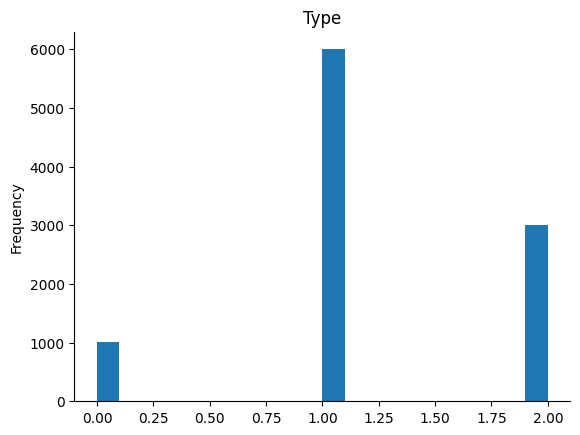

In [23]:


from matplotlib import pyplot as plt
data['Type'].plot(kind='hist', bins=20, title='Type')
plt.gca().spines[['top', 'right',]].set_visible(False)

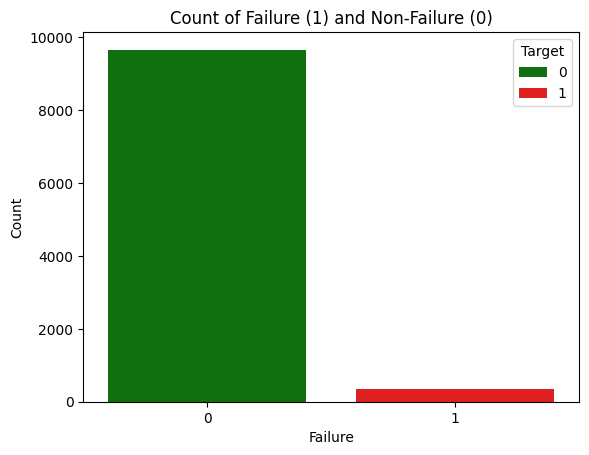

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Failure and not failure cases
custom_palette = {0: 'green', 1: 'red'}  # Success (type 1) is green, failure is red
sns.countplot(x='Target',hue='Target', data=data,palette=custom_palette)
plt.xlabel('Failure')
plt.ylabel('Count')
plt.title('Count of Failure (1) and Non-Failure (0)')
plt.show()

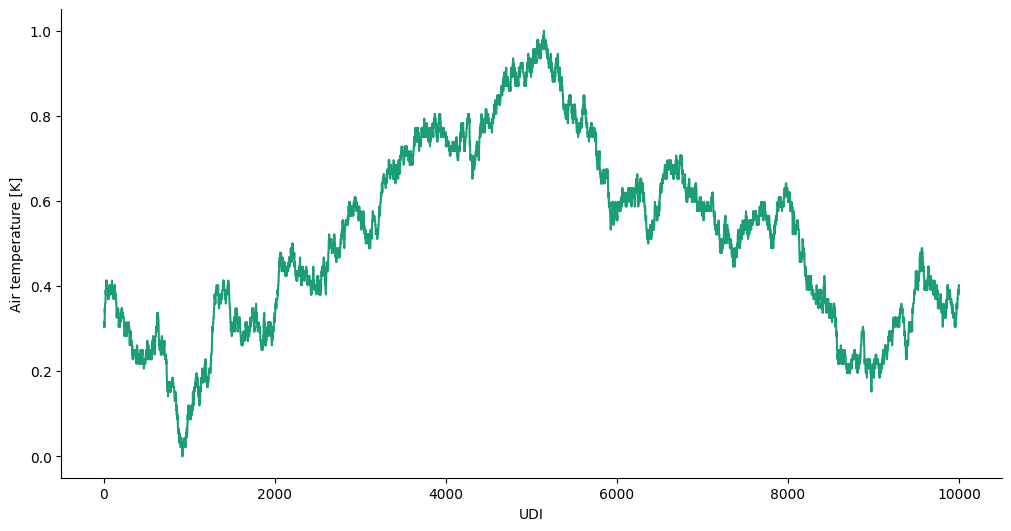

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['UDI']
  ys = series['Air temperature [K]']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('UDI', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('UDI')
_ = plt.ylabel('Air temperature [K]')

In [26]:
from imblearn.over_sampling import SMOTE
# Separate features and target variable
X = data.drop(columns=['Failure Type'])
y = data['Failure Type']

# Instantiate SMOTE
smote = SMOTE()

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


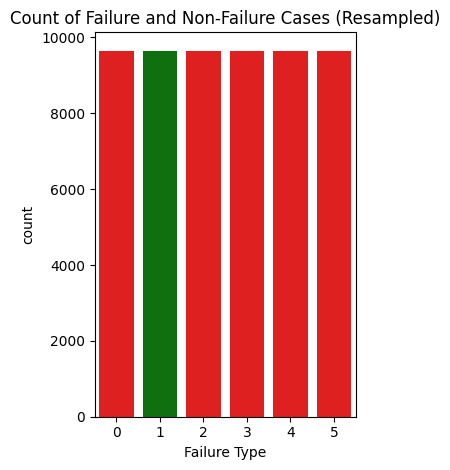

In [28]:
# Plot resampled dataset
plt.subplot(1, 2, 2)
custom_palette = {1: 'green', 0: 'red' ,  2: 'red', 3: 'red', 4: 'red', 5: 'red'}  # Success (type 1) is green, failure is red
sns.countplot(x=y_resampled,hue=y_resampled, palette=custom_palette, legend=False)
plt.title('Count of Failure and Non-Failure Cases (Resampled)')

plt.tight_layout()
plt.show()

In [29]:
# Create a new dataframe with the resampled data
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Failure Type'] = y_resampled

# Display the first few rows of the resampled dataframe
resampled_data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,7003,2,0.304348,0.358025,0.222934,0.535714,0.000000,0,1
1,2,1003,1,0.315217,0.370370,0.139697,0.583791,0.011858,0,1
2,3,1004,1,0.304348,0.345679,0.192084,0.626374,0.019763,0,1
3,4,1005,1,0.315217,0.358025,0.154249,0.490385,0.027668,0,1
4,5,1006,1,0.315217,0.370370,0.139697,0.497253,0.035573,0,1
...,...,...,...,...,...,...,...,...,...,...
57907,5690,1778,0,0.641070,0.546230,0.142872,0.559481,0.831518,1,5
57908,8737,6268,1,0.238054,0.337673,0.230617,0.458018,0.857883,1,5
57909,5955,8786,2,0.743481,0.796882,0.257080,0.581167,0.979906,1,5
57910,4230,3540,1,0.766343,0.666705,0.246494,0.369873,0.909071,1,5


Establish a Deep Neural network Architecture by using PyTorch library to handle the multi
class classification task.

In [37]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Split features and target variable
X = resampled_data.drop(columns=['UDI', 'Failure Type']).values
y = resampled_data['Failure Type'].values

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create a PyTorch dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split dataset into train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Define the neural network architecture
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

# Initialize the model
input_size = X.shape[1]
hidden_size = 32  # You can adjust the number of neurons in the hidden layer
num_classes = len(resampled_data['Failure Type'].unique())  # Assuming multi-class classification
model = MLP(input_size, hidden_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Train the model
num_epochs = 10
train_accuracy_list = []
test_accuracy_list = []
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    # Calculate accuracy on train set
    model.eval()
    correct_train = 0
    total_train = 0
    with torch.no_grad():
        for inputs, labels in train_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
    train_accuracy = correct_train / total_train
    train_accuracy_list.append(train_accuracy)

    # Calculate accuracy on test set
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    test_accuracy = correct_test / total_test
    test_accuracy_list.append(test_accuracy)

    print(f'Accuracy on test set for epoch {epoch+1}: {(test_accuracy) * 100:.2f}%')

Epoch [1/10], Loss: 1.8681533336639404
Accuracy on test set for epoch 1: 16.27%
Epoch [2/10], Loss: 1.850609540939331
Accuracy on test set for epoch 2: 16.27%
Epoch [3/10], Loss: 1.8856972455978394
Accuracy on test set for epoch 3: 16.27%
Epoch [4/10], Loss: 1.8330656290054321
Accuracy on test set for epoch 4: 16.27%
Epoch [5/10], Loss: 1.9032410383224487
Accuracy on test set for epoch 5: 16.27%
Epoch [6/10], Loss: 1.9207849502563477
Accuracy on test set for epoch 6: 16.27%
Epoch [7/10], Loss: 1.7979779243469238
Accuracy on test set for epoch 7: 16.27%
Epoch [8/10], Loss: 1.850609540939331
Accuracy on test set for epoch 8: 16.27%
Epoch [9/10], Loss: 1.8856972455978394
Accuracy on test set for epoch 9: 16.27%
Epoch [10/10], Loss: 1.938328742980957
Accuracy on test set for epoch 10: 16.27%


5. By using GridSearch tool from sklearn library chose the best hyper-parameters (learning rate ,
optimizers, epoch, model architecture, etc) that will give an efficient model.

In [36]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Split features and target variable
X = resampled_data.drop(columns=['UDI', 'Failure Type']).values
y = resampled_data['Failure Type'].values

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create a PyTorch dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Define the neural network architecture
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

# Define data loaders
def get_data_loaders(train_size, batch_size):
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

# Define grid search parameters
hidden_sizes = [32]
learning_rates = [0.001,0.01]
num_epochs = [5,10]
batch_sizes = [32]

best_accuracy = 0.0
best_parameters = {}

# Perform manual grid search
for hidden_size in hidden_sizes:
    for lr in learning_rates:
        for epoch in num_epochs:
            for batch_size in batch_sizes:
                model = MLP(input_size=X.shape[1], hidden_size=hidden_size, num_classes=len(np.unique(y)))
                criterion = nn.CrossEntropyLoss()
                optimizer = torch.optim.Adam(model.parameters(), lr=lr)
                train_loader, test_loader = get_data_loaders(train_size=int(0.8 * len(dataset)), batch_size=batch_size)

                # Train the model
                for _ in range(epoch):
                    model.train()
                    for inputs, labels in train_loader:
                        optimizer.zero_grad()
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        loss.backward()
                        optimizer.step()

                # Evaluate the model
                model.eval()
                correct = 0
                total = 0
                with torch.no_grad():
                    for inputs, labels in test_loader:
                        outputs = model(inputs)
                        _, predicted = torch.max(outputs.data, 1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()

                accuracy = correct / total
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_parameters = {
                        'hidden_size': hidden_size,
                        'lr': lr,
                        'num_epochs': epoch,
                        'batch_size': batch_size
                    }

print("Best Hyperparameters:", best_parameters)
print("Best Accuracy:", best_accuracy * 100, "%")


Best Hyperparameters: {'hidden_size': 32, 'lr': 0.01, 'num_epochs': 10, 'batch_size': 32}
Best Accuracy: 16.757316757316758 %


Visualize the two graph (Loss / Epochs) and (Accuracy / Epochs) for both training and test
data, give your interpretation.

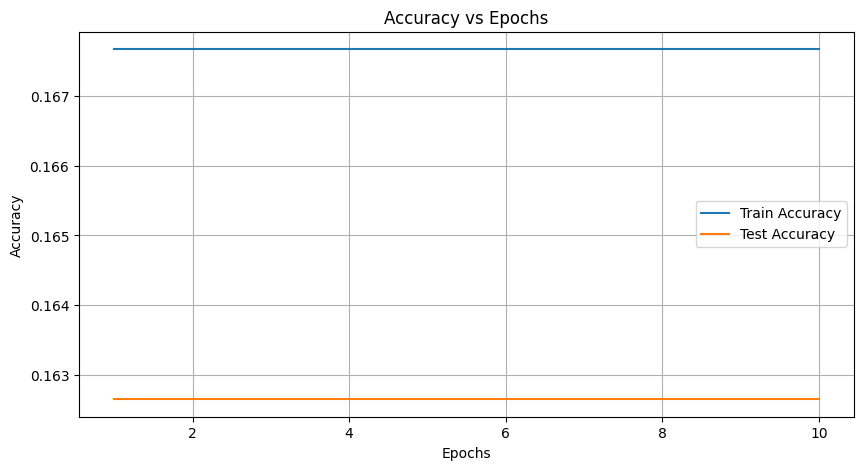

In [38]:
# Plot accuracy vs epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

Calculate metrics like accuracy, sensitivity, f1 score, etc, on both training and test dataset.

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split features and target variable
X_train = train_dataset[:][0]
y_train = train_dataset[:][1]
X_test = test_dataset[:][0]
y_test = test_dataset[:][1]

# Define data loaders for train and test sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Calculate metrics on training set
model.eval()
y_train_pred = []
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_train_pred.extend(predicted.tolist())

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

# Calculate metrics on test set
y_test_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_test_pred.extend(predicted.tolist())

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Metrics:
Accuracy: 0.1677
Precision: 0.0281
Recall: 0.1677
F1 Score: 0.0482

Test Metrics:
Accuracy: 0.1627
Precision: 0.0265
Recall: 0.1627
F1 Score: 0.0455


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Apply several regularization techniques on your architecture then compare the obtained result
with the first model.

In [40]:
# Define the neural network architecture with regularization techniques
class RegularizedMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_prob=0.5):
        super(RegularizedMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)
        self.batch_norm = nn.BatchNorm1d(hidden_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.batch_norm(out)  # Apply batch normalization
        out = self.relu(out)
        out = self.dropout(out)     # Apply dropout
        out = self.fc2(out)
        out = self.softmax(out)
        return out


regularized_model = RegularizedMLP(input_size, hidden_size, num_classes)

optimizer = torch.optim.Adam(regularized_model.parameters(), lr=0.001, weight_decay=1e-5)  # Apply L2 regularization

# Train the regularized model
num_epochs = 10
for epoch in range(num_epochs):
    regularized_model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = regularized_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')
# Evaluate the regularized model
regularized_model.eval()
with torch.no_grad():
    y_test_pred_regularized = []
    y_test_true = []

    for inputs, labels in test_loader:
        outputs = regularized_model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_test_pred_regularized.extend(predicted.tolist())
        y_test_true.extend(labels.tolist())

# Calculate accuracy using accuracy_score
test_accuracy_regularized = accuracy_score(y_test_true, y_test_pred_regularized)
print(f'Test Accuracy (Regularized Model): {test_accuracy_regularized:.4f}')



Epoch [1/10], Loss: 1.7591462135314941
Epoch [2/10], Loss: 1.758347749710083
Epoch [3/10], Loss: 1.7448827028274536
Epoch [4/10], Loss: 1.724391222000122
Epoch [5/10], Loss: 1.682320475578308
Epoch [6/10], Loss: 1.6479036808013916
Epoch [7/10], Loss: 1.709942102432251
Epoch [8/10], Loss: 1.619901418685913
Epoch [9/10], Loss: 1.6446661949157715
Epoch [10/10], Loss: 1.5986665487289429
Test Accuracy (Regularized Model): 0.4021
